![My Logo](https://thoughtsociety.org/wp-content/uploads/2019/03/ts_notebook_header.png)

# KMeans  Clustering for Market Segmentation

This kernel demonstrates a simple way to segment customers using Market Basket Analysis based on:

* Age
* Annual Income
* Spending Score 1-100

Using the elbow method to find the best number of clusters to segment into groups showing annual income vs. spending score may be done.

### Dataset Description

The dataset is small but illustrative of how the KMeans algorithm works.

1. Gender
2. Age
3. Annual Income
4. Spending Score of 1-100

At the end of the day, sex and age did not contribute 

## Here is what we will be doing

1. Get Mall_Customers.csv from my github public repo
2. EDA 
 * Ring chart of the Gender
 * Countplot showing number of different ages
 * 3 Scatter plots showing age, income and spending level
3. Elbow test for optimal number of clusters
4. Create two markers based on gender - 100, 200 (f/m)
5. Fit_Predict based on n_clusters = 5
6. Resulting scatter showing:
 * Income
 * Spending Score
 * Color = predicted data
 * Marker size = Gender value
 * Second one where marker size = age *4


 [Based on Kaggle kernel - 'Market Segmentation with Clustering'](https://www.kaggle.com/ecemboluk/market-segmentation-with-clustering)

[Thanks to Kaggle User Ecem Bölük](https://www.kaggle.com/ecemboluk)

<a id="1"></a>
### Read and Explore Data

In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.cluster import KMeans

In [65]:
data = pd.read_csv('https://raw.githubusercontent.com/thoughtsociety/ads_track4/master/datasets/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [66]:
# we can drop 'Customer ID' as its relevance is questionable
 
data.drop('CustomerID',axis=1,inplace=True)

In [67]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [69]:
# No nulls at all

print(pd.isnull(data).sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [70]:
# The new df structure - pretty simple

data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


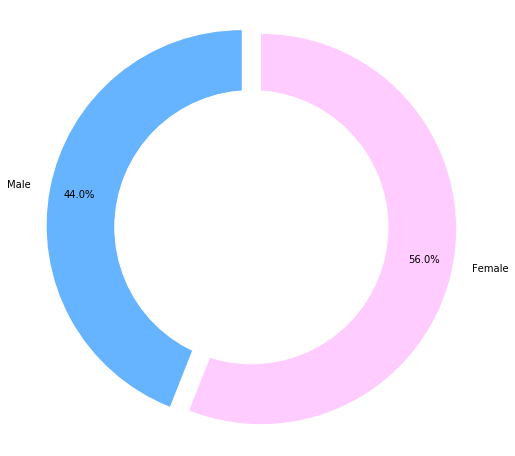

In [71]:
# Here is a pie chart showing male to female proportions
# 10% larger female shopper observations

labels = ['Male','Female']
sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#66b3ff','#ffccff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

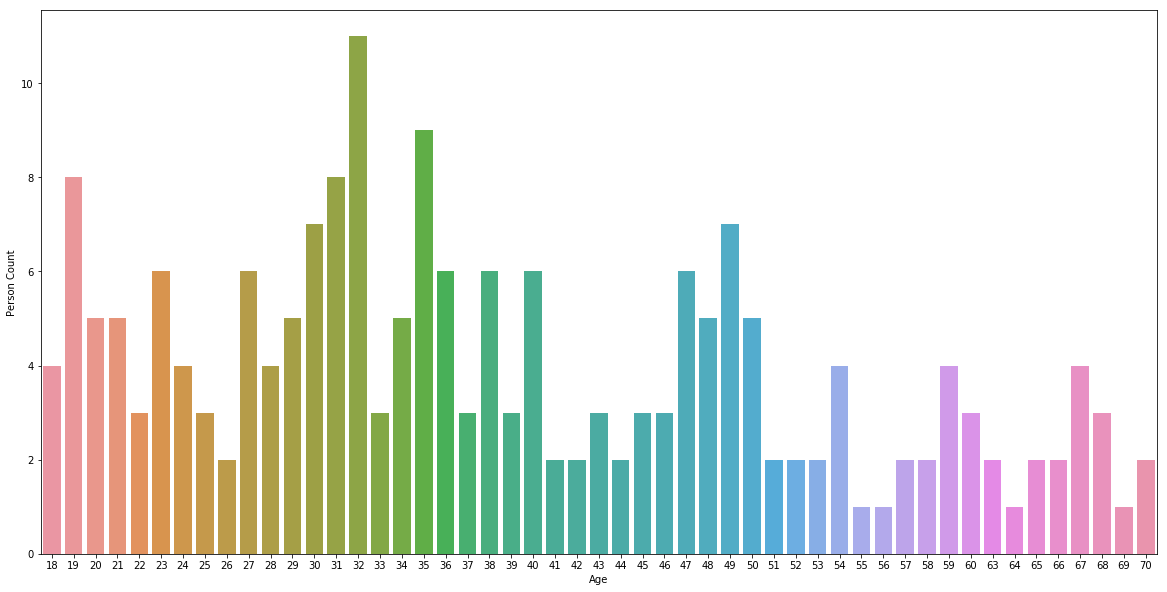

In [77]:
# How about a count of people of different ages?

plt.figure(figsize=(20,10))
sns.countplot(data.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

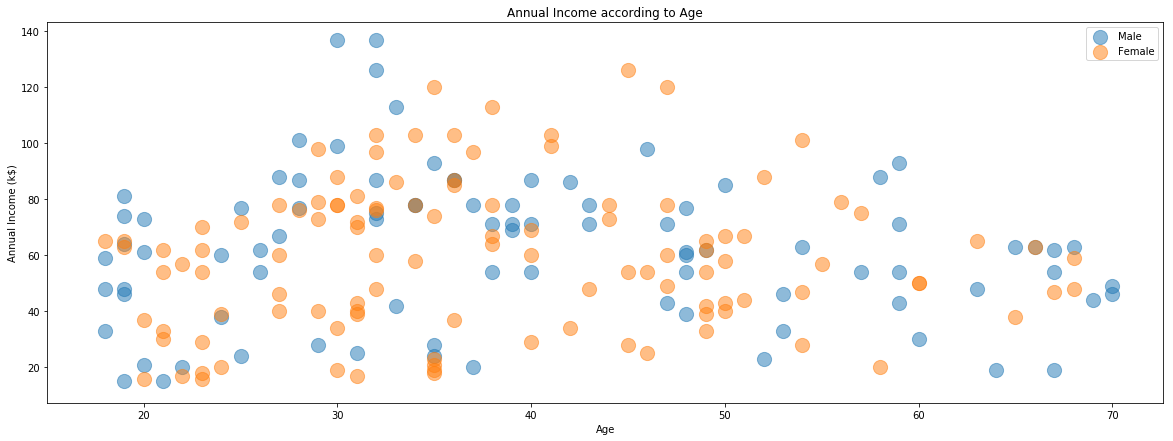

In [73]:
# Annual income according to age is pretty helpful
# Looks like millenials are pulling in the highest salaries at the moment

plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='Annual Income (k$)', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Annual Income according to Age")
plt.show()

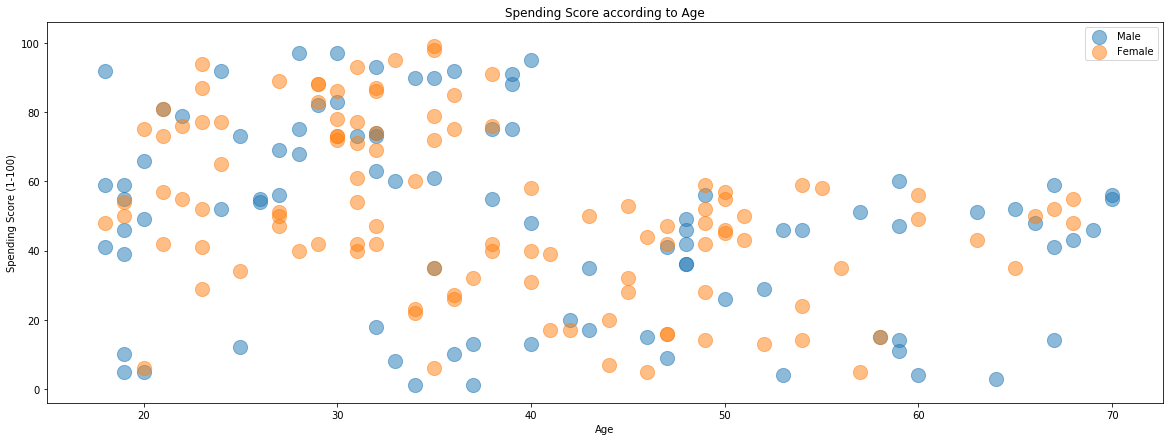

In [74]:
# Spending score by age is pretty informative
# 20 - 40 are way up there with 45 and up slowing spending down 
# Makes sense to me

plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='Spending Score (1-100)', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Spending Score according to Age")
plt.show()

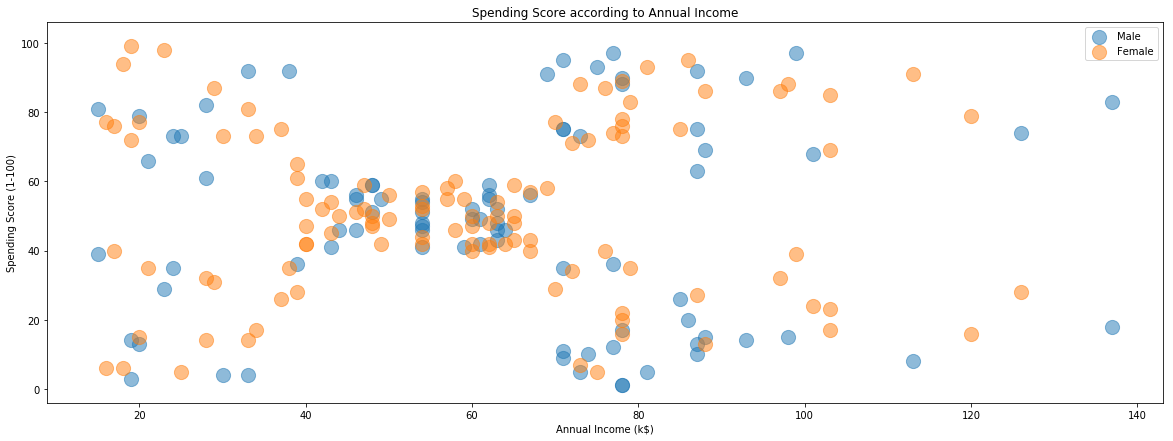

In [75]:
# This is interesting - low incomes at $20-40k spend a lot
# There seems to be a frugality gap between 40k and 70k
# Then over 70k spends high through 100k+ incomes

plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i,cmap=plt.cm.jet)
plt.legend()
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Spending Score according to Annual Income")
plt.show()

Time to implement the K-Means Clustering Algorithm

A good thing to do is to programmatically derive the best value of 'K' 
by looping through a **fit** operation while building the **wcss** (within cluster sum of errors) from **kmeans.inertia_** values.

This is complex so a good read will help.
[K-Means in Real Life: Clustering Workout Sessions](https://towardsdatascience.com/k-means-in-real-life-clustering-workout-sessions-119946f9e8dd)
or:

[Finding the optimal number of clusters for K-Means through Elbow method using a mathematical approach compared to graphical approach](https://www.linkedin.com/pulse/finding-optimal-number-clusters-k-means-through-elbow-asanka-perera/)

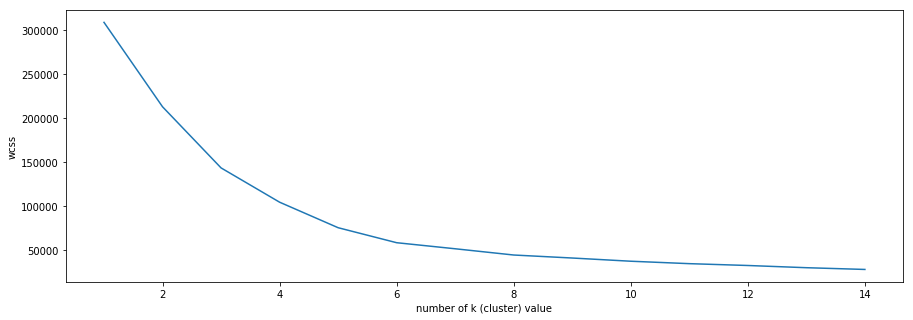

In [47]:
#define k value
wcss = []
data_model = data.drop(['Gender'],axis=1)
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

# the best value is elbow value. It's 5.
plt.figure(figsize=(15,5))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

In [ ]:
# 5 is going to work for this example

In [80]:
# Convert gender to either 100 or 300 to set the size of bubbles based on gender

def converter(gender):
    
    if gender=='Male':
        return 300
    else:
        return 100
data['Gender'] = data['Gender'].apply(converter)

In [85]:
# Convert Age to to either 100 or 300 to set the size of bubbles based on gender

def converter(age):
    
    if age <35:
        return 100
    else:
        return 300
data['Age'] = data['Age'].apply(converter)

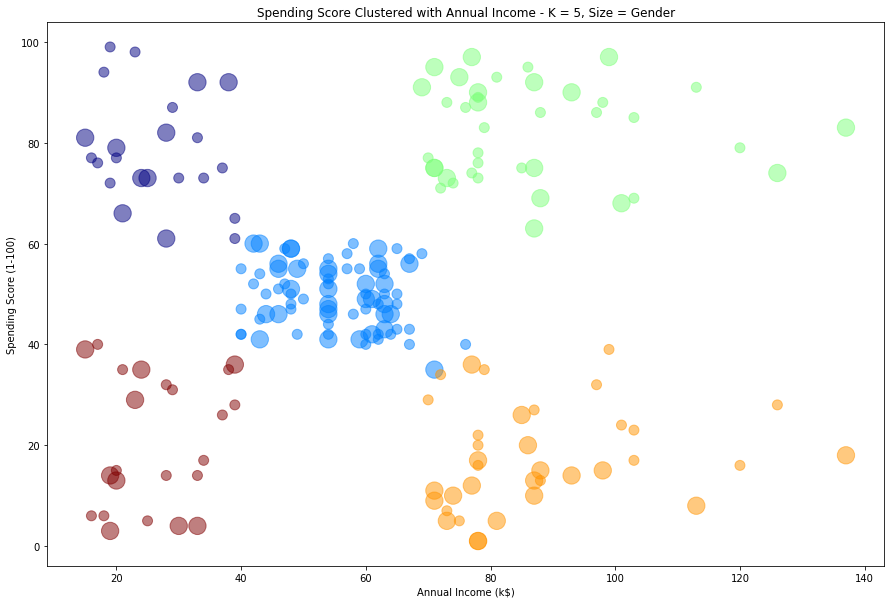

In [84]:
# clusters=5, predict is result of fit_predict
# Now we instantiate kmeans
kmeans = KMeans(n_clusters=5)

# Run a prediction/fit at the same time
data_predict = kmeans.fit_predict(data_model)

# Setup our figure to show the clusters
plt.figure(figsize=(15,10))
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = data_model , 
            c = data_predict+2 , s = data['Gender'] ,alpha=.5,cmap=plt.cm.jet)

# Set some labels for x and y
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
# set a title
plt.title("Spending Score Clustered with Annual Income - K = 5, Size = Gender")

# Plot it

plt.show()

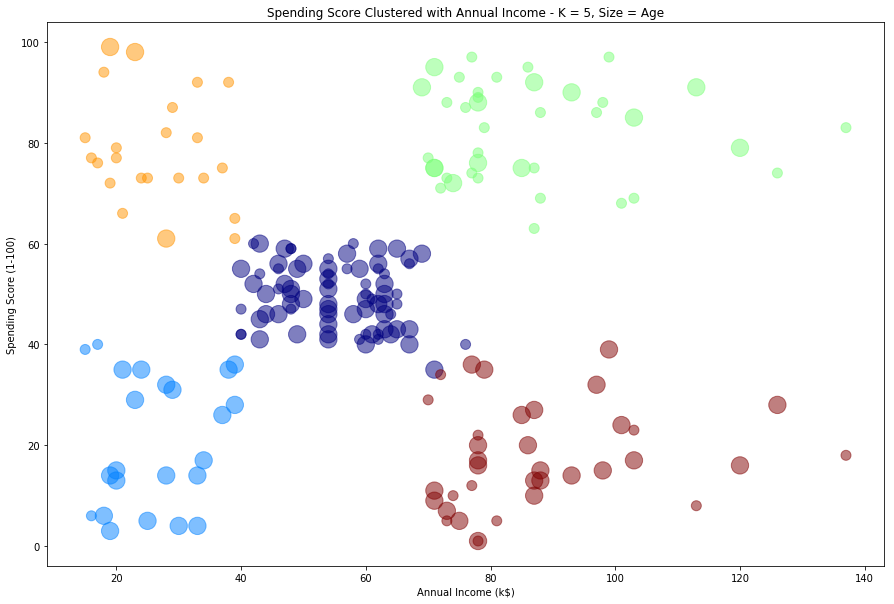

In [87]:
# clusters=5, predict is result of fit_predict
# Now we instantiate kmeans
kmeans = KMeans(n_clusters=5)

# Run a prediction/fit at the same time
data_predict = kmeans.fit_predict(data_model)

# Setup our figure to show the clusters
plt.figure(figsize=(15,10))
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = data_model , 
            c = data_predict+2 , s = data['Age'] ,alpha=.5,cmap=plt.cm.jet)

# Set some labels for x and y
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
# set a title
plt.title("Spending Score Clustered with Annual Income - K = 5, Size = Age")

# Plot it

plt.show()

In [ ]:
# Here are the cluster numbers that were used to assign a color to uniquely indetify the different clusters

In [56]:
data_predict

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

## Results

We could say that even though age is a factor in determining Market Basket prediction, it looks like the lowest annual income cluster has the highest spending score.  It also shows that the lower income also belongs to a low spending score cluster. At the higher income there are both a low and high spending group. 

We ran two cluster (scatter) plots setting the size of the bubbles according to two criteria:

Male(300) or Female(100) 
Age <35(100) or >35(300).  

If this were to be used to inform a marketing campaign, there could be two targets:

1. Low spend,low income
2. Low spend, high income 

from which we could move both of these groups up in spending.
